<h1 style='text-aling:center;color:Navy'>  Big Data Systems - Fall 2021  </h1>
<h1 style='text-aling:center;color:Navy'>  Assignment 3  </h1>

***

This assignment is focused on Data Analysis and Visualization, as well as utilizing some Query language.

To complete the assignment, you should complete this notebook by filling in the cells provided.

<b>Submission Deadline: This assignment is due Monday, Oct 20 at 11:59 P.M.</b>

A few notes before you start:
- Directly sharing answers is not okay, but discussing problems with other students is encouraged.
- You should start early so that you have time to get help if you're stuck.

- Before continuing the assignment, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to okpy.org and flag the correct version. There will be another submit cell at the end of the assignment when you finish!

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>
<br>
Before you begin completing the assignment, execute the following cell to load the provided tests.

In [17]:
# Don't change this cell; just run it. 
# When you log-in please hit return (not shift + return) after typing in your email
from client.api.notebook import Notebook
ok = Notebook('Assignment3.ok')

Assignment: Assignment3: Query and Analysis
OK, version v1.15.44



In [18]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
ERROR  | auth.py:101 | {'error': 'invalid_grant'}


Saved 'Assignment3.ipynb'.
Performing authentication
Please enter your bCourses email: vijayasimha.bheemireddy@ucdenver.edu
Unable to find an open port for authentication.

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://kubemaster.ucdenver.pvt:5000/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: JdGNtLQc6z4YsktLm8WuM6E9JmIR8k


/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/opt/conda/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Successfully logged in as vijayasimha.bheemireddy@ucdenver.edu
Submit... 100% complete
Submission successful for user: vijayasimha.bheemireddy@ucdenver.edu
URL: https://kubemaster.ucdenver.pvt:5000/UCDenver/CSCI4951-5951/fa21/assignment3/submissions/eEl60d



<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style="font-size:35px;color:#3665af">Section 1: Data Analysis </span>

This lab will explore the use of Pandas for performing data analysis and MatplotLib for visualizing the results. We will be exploring these tools using a publicly available genome annotation file often used in DNA analysis pipelines. Don't worry if you aren't familiar with genetics, the techniques for managing the data will be the same as any other data set the only difference will be in interpreting the results which is beyond the scope of this assignment.

### Template Data Analysis Pipeline
These are the steps we will be exploring in this lab in relation to a larger data analysis pipeline:
#### 1. Load Data
In this section, we will explore both loading a small file into Pandas directly. In the other section of this assignment we  explore loading data from a remote database using Google BigQuery.

#### 2. Explore the Data
It is very helpful to understand what the data looks like, the types of attributes, number of rows, distribution of values for attributes, etc. Pandas provides functions like ```.head()```, ```.tail()``` and ```.describe()``` to explore the data more analytically. Matplotlib can be used to visualize the data and is very useful for spotting distributions or relations between values. This information can be used to validate our experiment, and inform our predictive model (again, beyond the scope of this assignment).

#### 3. Clean the Data
Data is never perfect, we'll have missing values, extreme outliers, or values that just make no sense. Luckily, Pandas provides functions like ```.isna()``` to identify missing values. Sometimes cleaning the data can be very involved, as in the case of DNA analysis, but this lab focuses on cleaning by removing extraneous data.

***

In [22]:
# import the packages you'll need
import pandas as pd
import matplotlib.pyplot as plt

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">1. Loading Data </div>

### Gene Annotation
This section of the assignment will begin by loading a tabular file into a Pandas dataframe, exploring that data, then cleaning it and visualizing the results. This file contains gene annotations, which are regions of DNA that are 'read' in a cell and contain all the data that makes up an organism, like a human. 

The first line of code retrieves the data file from an online repository, which is similar in format to a csv file. It can be read using the `read_csv()` method provided by Pandas with tweeked parameters for the specifics of this file type. 

Since this file is not _exactly_ in a supported file format, the process for loading it has been done for you. But some things to note:
1. Pandas has its own command for reading files by type, which loads directly into a dataframe
2. We can define our own column names that will appear as the header of the dataframe when Pandas loads the file 
3. We can specify how Pandas should read the file i.e separator, comment tokens, in chucks, etc.

In [20]:
# grab the file from the internet 
!wget ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
    
# define the column names, which are not provided in the file
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']

# load the file into a Pandas dataframe
# compression = file is compressed using gzip, specify this to read compressed file directly
# sep = separator, how each separate data value is separated
# comment = lines beginning with this symbol are ignored
# low_memory = process whole file at once rather than chunks, prevents mixed types
# header = file has no header, tell method not to look for one
# names = specify custom column names from list above
annotations = pd.read_csv('Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

--2021-10-21 05:51:14--  ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
           => ‘Homo_sapiens.GRCh38.85.gff3.gz.1’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.139
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.139|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-85/gff3/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.85.gff3.gz ... 38469475
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.85.gff3.gz ... done.
Length: 38469475 (37M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  36.69M  7.19MB/s    in 8.1s    

2021-10-21 05:51:24 (4.54 MB/s) - ‘Homo_sapiens.GRCh38.85.gff3.gz.1’ saved [38469475]



<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">2. Exploring the Data </div>

Start by simply printing out the first 10 rows of the annotations to get a sense for the data and its schema. Pandas has a single method for doing this, which can be found in the [documentation for Pandas Dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 

### Question 1
Print out the _first 10_ rows of the annotations dataset

In [23]:
annotations.head(10)

,seqid,source,type,start,end,score,strand,phase,attributes
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000..."
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine
5,1,.,biological_region,10681,10688,0.999,-,.,logic_name=eponine
6,1,.,biological_region,10707,10716,0.999,+,.,logic_name=eponine
7,1,.,biological_region,10708,10718,0.999,-,.,logic_name=eponine
8,1,.,biological_region,10735,10747,0.999,-,.,logic_name=eponine
9,1,.,biological_region,10737,10744,0.999,+,.,logic_name=eponine


<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">2.1. Closer Look </div>

There are 25 chromosomes in this human genome (22 numbered + X + Y + MT [MT = mitochondrial, if you're wondering]).
chromosomes are physical divisions of the sequence that can be analysed independently in most cases, making analysis easier by focusing on a smaller portion of the whole sequence. The boundaries of each chromosome in the whole sequence are specified in the annotation file, but first we need to check out how the chromosomes are defined in the annotation file. The chromosome is indicated in the column `seqid`

### Question 2
Print out the _unique_ `seqid` values of the annotations dataset

In [25]:
#chrs = [str(i) for i in range(1,23)] + ['X', 'Y', 'MT']
#chrs_only = annotations[annotations['seqid'].isin(chrs)]
annotations.seqid.unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '3', '4', '5', '6', '7', '8', '9',
       'GL000008.2', 'GL000009.2', 'GL000194.1', 'GL000195.1',
       'GL000205.2', 'GL000208.1', 'GL000213.1', 'GL000214.1',
       'GL000216.2', 'GL000218.1', 'GL000219.1', 'GL000220.1',
       'GL000221.1', 'GL000224.1', 'GL000225.1', 'GL000226.1',
       'KI270302.1', 'KI270303.1', 'KI270304.1', 'KI270305.1',
       'KI270310.1', 'KI270311.1', 'KI270312.1', 'KI270315.1',
       'KI270316.1', 'KI270317.1', 'KI270320.1', 'KI270322.1',
       'KI270329.1', 'KI270330.1', 'KI270333.1', 'KI270334.1',
       'KI270335.1', 'KI270336.1', 'KI270337.1', 'KI270338.1',
       'KI270340.1', 'KI270362.1', 'KI270363.1', 'KI270364.1',
       'KI270366.1', 'KI270371.1', 'KI270372.1', 'KI270373.1',
       'KI270374.1', 'KI270375.1', 'KI270376.1', 'KI270378.1',
       'KI270379.1', 'KI270381.1', 'KI270382.1', 'KI270383.1',
       'KI270384.1', 'KI270385.1', 'KI270386

### Question 3
Summarize the annotations dataset. Provide the count, mean, std, min, 25%, 50%, 75%, max values 

In [26]:
annotations.describe(include='all')

,seqid,source,type,start,end,score,strand,phase,attributes
count,2601849,2601849,2601849,2.601849e+06,2.601849e+06,2601849,2601849,2601849,2601849
unique,194,7,31,NaN,NaN,2108,3,4,1623077
top,1,havana,exon,NaN,NaN,.,+,.,logic_name=eponine
freq,235068,1441093,1182163,NaN,NaN,2419339,1305756,1897245,65422
mean,NaN,NaN,NaN,7.409822e+07,7.410290e+07,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,5.584042e+07,5.584077e+07,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000e+00,6.470000e+02,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.159071e+07,3.159528e+07,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,5.927295e+07,5.928351e+07,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.100164e+08,1.100191e+08,NaN,NaN,NaN,NaN


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">3. Cleaning the Data </div>


You'll notice there are a lot more than 25 values. The extra values come from regions that are annotated but not included in the main genome because it is not clear where they belong. We will ignore these by filtering them out.

We can do this by creating a list of value we want to keep (or reject, but that list would be longer), then query the dataframe for rows with values _isin_ (hint) the list.

### Question 4
Filter and print the number of unique `seqid's`

In [27]:
# list containing seqid values to keep 
chrs = [str(i) for i in range(1,23)] + ['X', 'Y', 'MT']

# query annotations with relevant seqid labels
chrs_only = annotations[annotations['seqid'].isin(chrs)]

# print the number of unique seqid's to make sure you filtered correctly
len(chrs_only.seqid.unique())

25

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">3.1. Verifying </div>

Now that we have the completed portions (the 25 chromosomes) of the genome separated, lets see how much (percent) of the total genome is unassembled. This will help verify how much of the data we will be missing out on if we only base our analysis on the annotated chromosomes compared to using all annotated data. Luckily, there are rows that sumamrize each region (chromosome and unassembled) and contain information about their entire length.

First, extract only the rows that summarize each `seqid` region (indicated by a `source` equal to GRCh38). Then, find only unassembled regions and create a new Series containing the length of each region. Finally, sum up the lengths of each chromosome we found in the last cell.

### Question 5
Find the length of incomplete regions, find the length of genome sequence, and find the percentage

In [32]:
# A source of GRCh38 is used for rows that provide a summary of each seqid value
GRCh38_only = annotations[annotations.source == 'GRCh38']

# find the length of the incomplete regions
# (length = end - start)
incomplete_regions = GRCh38_only[GRCh38_only.type == 'supercontig']
incomplete_lens = incomplete_regions.end-incomplete_regions.start
print(incomplete_lens)


2510747    209708
2510751    201708
2510760    191468
2510794    182895
2510820    185590
            ...  
2513955     62943
2513974     40190
2513996     36722
2513997     79589
2513998     71250
Length: 169, dtype: int64


In [35]:
total_len = chrs_only[chrs_only.source == 'GRCh38']['end'].sum()
print(total_len)

3087946888


In [36]:
# find the percentage
incomplete_ratio = incomplete_lens.sum() / total_len
#print(incomplete_ratio*100)
'{0:.2f}%'.format(incomplete_ratio * 100)

'0.37%'

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">3.2. Plotting </div>


Now that we have the chromosomes we want to focus on, we can explore the genes within them. Genes can be any length, but it will be helpful to know the range of length values for choosing an appropriate model in the downstream analysis (beyond the scope of this assignment, but think machine learning or statistical model).

The most helpful plot in this situation will likely be a histogram, which will capture the number of genes in a set range of lengths. Which means first, we will find the length of each gene in the annotation file and store as a new column in a dataframe. Then, use Matplotlib to generate a histogram plot with 50 bins for the length and a log-scale y-axis, use the [Matplotlib `hist` documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) to find the parameters needed.

### Question 6
Get the correct genes, compute and store the length of each gene, and create a plot

In [38]:
genes = annotations[annotations['type']=='gene']
genes.info()
genes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42485 entries, 16 to 2601846
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seqid       42485 non-null  object
 1   source      42485 non-null  object
 2   type        42485 non-null  object
 3   start       42485 non-null  int64 
 4   end         42485 non-null  int64 
 5   score       42485 non-null  object
 6   strand      42485 non-null  object
 7   phase       42485 non-null  object
 8   attributes  42485 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.2+ MB


,seqid,source,type,start,end,score,strand,phase,attributes
16,1,havana,gene,11869,14409,.,+,.,ID=gene:ENSG00000223972;Name=DDX11L1;biotype=t...
28,1,havana,gene,14404,29570,.,-,.,ID=gene:ENSG00000227232;Name=WASH7P;biotype=un...
71,1,havana,gene,52473,53312,.,+,.,ID=gene:ENSG00000268020;Name=OR4G4P;biotype=un...
74,1,havana,gene,62948,63887,.,+,.,ID=gene:ENSG00000240361;Name=OR4G11P;biotype=u...
77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...


In [41]:
# then complute the length of each gene and store as a new column
# notice the syntax for adding a new column is fairly simple
# (length = end - start)
genes['length'] = genes['end'] - genes ['start']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


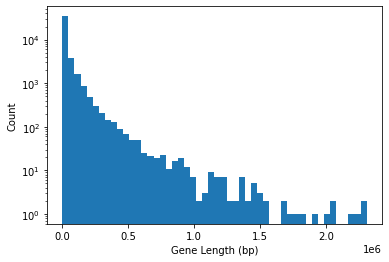

In [44]:
# setup the matplotlib hist plot with 50 bins and logarithmic scale on the y-axis
plt.hist(genes['length'], bins=50, log=True)
plt.ylabel('Count')
plt.xlabel('Gene Length (bp)')
plt.show()

<div style="font-size:20px;color:#F1F8FC;background-color:#0095EA;padding:10px;">3.3. More Complex Plot </div>

Now we're going to make a slightly more complex plot to display 3 variables together in a single 2D plot. Specifically we will plot gene count by chromosome and relate it to chromosome length in a scatter plot. 

To do this we will need the lengths of each chromosome, and the number of genes in each chromosome. Finding the lengths will be similar to part 3.1, **but** make sure to keep the `seqid` column to set as the new index to join the two dataframes later.

The genes per chromosome will also require the `seqid` column for joining, and you will need to use the `reset_index()` function before setting `seqid` as the new index.

### Question 7
Get chromosome length, count the genes for each chromosome, join the dataframes, and then plot the count against chromosome length

In [27]:
# first, get the chromosome lengths (only need entries with type==chromosome)
chr_lens = annotations[annotations['type']=='chromosome']
chr_lens['length'] = chr_lens['end'] - chr_lens['start']
#chr_lens = chr_lens.loc[:,['seqid', 'length']]
chr_lens.info()
chr_lens.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 2594560
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seqid       25 non-null     object
 1   source      25 non-null     object
 2   type        25 non-null     object
 3   start       25 non-null     int64 
 4   end         25 non-null     int64 
 5   score       25 non-null     object
 6   strand      25 non-null     object
 7   phase       25 non-null     object
 8   attributes  25 non-null     object
 9   length      25 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 2.1+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000...",248956421
235068,10,GRCh38,chromosome,1,133797422,.,.,.,"ID=chromosome:10;Alias=CM000672.2,chr10,NC_000...",133797421
328938,11,GRCh38,chromosome,1,135086622,.,.,.,"ID=chromosome:11;Alias=CM000673.2,chr11,NC_000...",135086621
483370,12,GRCh38,chromosome,1,133275309,.,.,.,"ID=chromosome:12;Alias=CM000674.2,chr12,NC_000...",133275308
634486,13,GRCh38,chromosome,1,114364328,.,.,.,"ID=chromosome:13;Alias=CM000675.2,chr13,NC_000...",114364327


In [28]:
# next, count genes for each chromosome
genes_per_chr = chr_lens.groupby('seqid').agg({'length':'count'}).reset_index()
genes_per_chr.rename(columns={'length':'count'},inplace=True)
genes_per_chr.info()
genes_per_chr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   seqid   25 non-null     object
 1   count   25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


,seqid,count
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seqid       25 non-null     object
 1   source      25 non-null     object
 2   type        25 non-null     object
 3   start       25 non-null     int64 
 4   end         25 non-null     int64 
 5   score       25 non-null     object
 6   strand      25 non-null     object
 7   phase       25 non-null     object
 8   attributes  25 non-null     object
 9   length      25 non-null     int64 
 10  count       25 non-null     int64 
dtypes: int64(4), object(7)
memory usage: 2.3+ KB


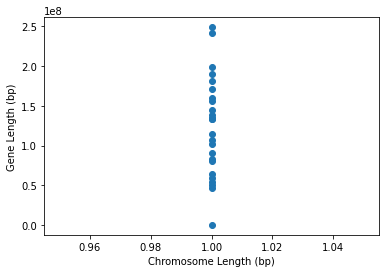

In [29]:
# join the dataframes on seqid
#gene count by chromosome and relate it to chromosome length in a scatter plot.
plot_frame = pd.merge(chr_lens, genes_per_chr, how='inner', on='seqid')
plot_frame.info()
plot_frame.head()

# then plot the count against the chromosome length
plt.scatter(plot_frame['count'], plot_frame['length'])
plt.ylabel('Gene Length (bp)')
plt.xlabel('Chromosome Length (bp)')
plt.show()

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">4. Concluding Remarks </div>


In this part we introduced loading, exploring, and cleaning a small dataset using the Pandas and Matplotlib libraries for Python. This data could be used in later analysis for analyzing genes at the chromosome-level, a process known as Variant Calling in a standard genome analysis pipeline. This data could also be used in a machine learning, statistical, or other predictive model to make data-driven decisions.

Both Pandas and Matplotlib have much more depth than what was presented here, but you can leverage a similar analysis pattern to other datasets using the specific tools to transform and visualize as needed.

<div style="font-size:30px;color:#3665af;background-color:#e1dfb1;padding:10px;">5. Exercise </div>

This exercise will have you load, explore, and clean a dataset. The dataset is called train.csv and can be found in Jupyterhub.

- Load and display the first 10 rows
- Summarize the dataset
- Remove columns with any missing values
- Create a 2D scatter plot with the following 3 variables: LotArea, YearBuilt, and SalePrice

In [19]:
# Load and display the first 10 rows
td = pd.read_csv('train.csv', sep=',')
td.info()
td.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [20]:
# Summarize the dataset
td.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
# Remove columns with any missing values
td.dropna(axis='columns')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
# Create a 2D scatter plot with the following 3 variables: LotArea, YearBuilt, and SalePrice
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

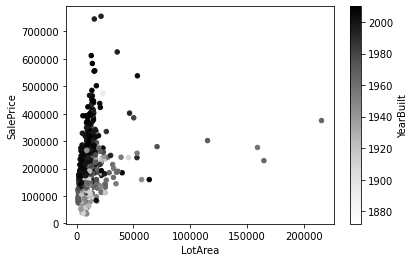

In [23]:
td = td[['LotArea', 'YearBuilt', 'SalePrice']]
td.dropna()
fig, ax = plt.subplots()
td.plot.scatter( x='LotArea', y='SalePrice', c='YearBuilt', ax=ax)

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

# <span style="font-size:35px;color:#3665af">Section 2: Query Language </span>


In this section of the assignment, we will be using Google BigQuery to query data from the "1000 Genomes Project", a publicly available database that contains information regarding known variants, genetic aberrations that can be the underlying cause of a disease. We will query this information and calculate a single analytical metric, which could normally be used to help verify the results of a DNA analysis pipeline, but in this case the data has been verified already so it can be used to verify your query instead.

Information about the datasets can be found [here](http://googlegenomics.readthedocs.io/en/latest/use_cases/discover_public_data/1000_genomes.html).

In [1]:
!pip install pandas_gbq

  Using cached pandas_gbq-0.15.0-py3-none-any.whl (25 kB)
  Using cached google_cloud_bigquery-2.28.1-py2.py3-none-any.whl (202 kB)
  Using cached pyarrow-5.0.0-cp37-cp37m-manylinux2014_x86_64.whl (23.6 MB)


In [7]:
# import a library for connecting Pandas to BigQuery
import pandas as pd
import pandas_gbq as pdgbq

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">1. Setup Connection </div>

Connect to BigQuery and run a test query, this will require a project with credits, enabling BigQuery API for your project, and authorization for this notebook to use BigQuery.

To enable the BigQuery API for your project go [here](https://console.cloud.google.com/flows/enableapi?apiid=bigquery).

Running the sample query below will provide a prompt to allow access for this notebook.

The pandas BigQuery extension will return the results of each query into a Pandas Dataframe for further analysis.

In [8]:
# here is a template query you can use to test your connection: 
query = 'SELECT * '
query += 'FROM `genomics-public-data.1000_genomes.sample_info` '
query += 'LIMIT 25'

# Insert your BigQuery Project ID Here
# Can be found in the Google web console https://console.cloud.google.com
projectid = "bigdatasystems-fall2021-327506"

# run a simple query, here we print the results without storing them so you can see it is a dataframe
# NOTE!! Google will ask you to authorize pandas when running for the first time!
pdgbq.read_gbq(query, projectid)

Downloading: 100%|██████████| 25/25 [00:00<00:00, 172.01rows/s]


,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
0,HG00144,GBR001,GBR,British in England and Scotland,female,mother,HG00155,,,,...,None,None,None,None,None,NaN,,None,EUR,European
1,HG00147,GBR002a,GBR,British in England and Scotland,female,child,,,HG00146,,...,None,None,None,None,None,NaN,,None,EUR,European
2,HG00153,GBR003,GBR,British in England and Scotland,female,child,,,,,...,None,True,None,None,True,NaN,,None,EUR,European
3,HG00248,GBR004,GBR,British in England and Scotland,female,child,HG00247,,,,...,None,None,None,None,None,NaN,,None,EUR,European
4,HG00377,HG00377,FIN,Finnish in Finland,female,,,,,,...,None,True,None,None,True,NaN,,None,EUR,European
5,HG00405,SH001,CHS,"Southern Han Chinese, China",female,child,,,,,...,None,True,None,None,True,NaN,,None,EAS,East Asian
6,HG00408,SH002,CHS,"Southern Han Chinese, China",female,child,,,,,...,None,True,None,None,True,NaN,,None,EAS,East Asian
7,HG00411,SH003,CHS,"Southern Han Chinese, China",male,child,,,,,...,None,None,None,None,None,NaN,,None,EAS,East Asian
8,HG00420,SH006,CHS,"Southern Han Chinese, China",male,child,,,,,...,None,True,None,None,True,NaN,,None,EAS,East Asian
9,HG00423,SH007,CHS,"Southern Han Chinese, China",female,child,,,,,...,None,True,None,None,True,NaN,,None,EAS,East Asian


In [24]:
bigdataquery_data = pdgbq.read_gbq(query, projectid)
bigdataquery_data.info()
bigdataquery_data.head()

Downloading: 100%|██████████| 25/25 [00:00<00:00, 143.22rows/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 62 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sample                               25 non-null     object 
 1   Family_ID                            25 non-null     object 
 2   Population                           25 non-null     object 
 3   Population_Description               25 non-null     object 
 4   Gender                               25 non-null     object 
 5   Relationship                         25 non-null     object 
 6   Unexpected_Parent_Child              25 non-null     object 
 7   Non_Paternity                        25 non-null     object 
 8   Siblings                             25 non-null     object 
 9   Grandparents                         25 non-null     object 
 10  Avuncular                            25 non-null     object 
 11  Half_Siblings                     

,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
0,HG00144,GBR001,GBR,British in England and Scotland,female,mother,HG00155,,,,...,None,None,None,None,None,NaN,,None,EUR,European
1,HG00147,GBR002a,GBR,British in England and Scotland,female,child,,,HG00146,,...,None,None,None,None,None,NaN,,None,EUR,European
2,HG00153,GBR003,GBR,British in England and Scotland,female,child,,,,,...,None,True,None,None,True,NaN,,None,EUR,European
3,HG00248,GBR004,GBR,British in England and Scotland,female,child,HG00247,,,,...,None,None,None,None,None,NaN,,None,EUR,European
4,HG00377,HG00377,FIN,Finnish in Finland,female,,,,,,...,None,True,None,None,True,NaN,,None,EUR,European


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">2. Writing a Query </div>


Now we can try a slightly larger query. The 1000 Genomes variant dataset contains over 3TB of genetic variants, which we can run analytical queries on in seconds using BigQuery.

We will begin by querying the dataset to get the reference_name, reference_bases, and alternate_bases that contain only one reference_base *and* one alternate_base. We will test these in the next step.

Query the [genomics-public-data:1000_genomes.variants] table. The results are >40M rows, so you can limit to ~50,000 rows to make the query run in a reasonable amount of time.

BigQuery SQL documentation can be found [here](https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators)

### Question 1
Write a query to get the reference_name, reference_bases, and alternate_bases that contains only <b>one</b> reference_base *and* <b>one</b> alternate_base

In [9]:
query = """SELECT reference_name, reference_bases, alternate_bases FROM `genomics-public-data.1000_genomes.variants` where char_length(ARRAY_TO_STRING(alternate_bases,''))=1 AND char_length(reference_bases)=1 limit 50000"""
print(query)

# this query will take some time depending on how many rows you want
data = pdgbq.read_gbq(query, projectid)
data.info()
data.head()


SELECT reference_name, reference_bases, alternate_bases FROM `genomics-public-data.1000_genomes.variants` where char_length(ARRAY_TO_STRING(alternate_bases,''))=1 AND char_length(reference_bases)=1 limit 50000


Downloading: 100%|██████████| 50000/50000 [00:01<00:00, 25609.54rows/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reference_name   50000 non-null  object
 1   reference_bases  50000 non-null  object
 2   alternate_bases  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


,reference_name,reference_bases,alternate_bases
0,10,T,[A]
1,14,C,[A]
2,18,C,[A]
3,20,C,[A]
4,9,T,[A]


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">3. Interpreting the Results </div>


We have provided two functions that can be applied to the results of the above query. The functions calculate whether a variant was a transition or a transversion. We can compute these, then take the ratio of the sum of each as a metric for verifying our dataset (in this case verifying the query).

Remeber that the query returns a dataframe, so you can use any function from the Pandas library that applies to a dataframe. 

#### Below is an explanation of where this metric comes from for those interested, but reading the below paragraph is not required for this assignment!
Transitions/Transversions are terminology for an interesting effect of the chemistry of DNA, which is made of 4 molecules divided into 2 shapes (pyrimidines and purines). A molecule of one shape is more likely to change to the other of the same shape than it is to one of the opposite shape. We can look at the ratio of these transitions to transversions over our entire dataset or a sampling of it as one of a few metrics to verify if the variants we found are correct. Genomes will have a set range of valid Ti/Tv ratios depending on the organism (humans are ~2.1-2.8). [For more about the molecules and their shapes](https://en.wikipedia.org/wiki/Nucleobase).

### Question 2
Apply the transitions and transversions

In [10]:
pyrimidines = ['A', 'G']
purines = ['T', 'C']

# transitions are a mutation to a base with a similar shape (e.g pyrimidine -> pyrimidine)
def transitions(row):
    if row['reference_bases'] in pyrimidines and row['alternate_bases'] in pyrimidines:
        return 1
    elif row['reference_bases'] in purines and row['alternate_bases'] in purines:
        return 1
    else:
        return 0
    
# transversions are a mutation to a base with a different shape (e.g pyrimidine -> purine)
def transversions(row):
    if row['reference_bases'] in pyrimidines and row['alternate_bases'] in purines:
        return 1
    elif row['reference_bases'] in purines and row['alternate_bases'] in pyrimidines:
        return 1
    else:
        return 0
    
# apply the functions above to the data set 
# queried from the 1000 Genomes database


data_transition = data.apply(transitions, axis=1)
data_transversion = data.apply(transversions, axis=1)


# the final output should be between 2.1-2.8, which is normal for humans
print(data_transition.sum() / data_transversion.sum())


2.1509957146458283


<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">4. More Advanced Query </div>


Now we will run a query using a user defined function (UDF) which in this case is small enough to include in the query. We have provided the function (written in Javascript) for you to examine the semantics of if you want to try writing your own in the future. 

This query will require the Google BigQuery client for Python (we are no longer using Pandas) due to the UDF. This will also require a key from your account, instructions for which are provided below.

In [11]:
# Imports the Google Cloud client library
from google.cloud import bigquery
from google.oauth2 import service_account

You will need to add credentials to run BigQuery from this Jupyter notebook
go to [this page](https://console.cloud.google.com/apis/credentials/serviceaccountkey), then
select this notebook for the account, select JSON and generate the key.
the key will download to your device, then either copy it to the directory
where this notebook is located and paste the name of the JSON file below,
or paste the full path to the JSON file

In [14]:
# link credentials file
credentials = service_account.Credentials.from_service_account_file('bigdatasystems-fall2021-327506-56b8107d733d.json')

# Instantiates a client
bigquery_client = bigquery.Client(project=projectid, credentials=credentials)

### Question 3
Count the number of transversions that occur in each chromosome using the UDF.

Hint: 
This query will again select the reference_name, and reference_bases and alternate_bases of length one. This time though, we will be counting per reference_name using the UDF provided. The trick here is that alternate_bases are an array of strings in this dataset, so you will need to turn that array into a single string somehow before checking its length. The next cell will print out the results of your query and the query will not actually run until the results are printed (lazily evaluated), so if you want to experiment with different queries, you can use the BigQuery interface [here](https://bigquery.cloud.google.com/table/genomics-public-data:1000_genomes.variants).

In [15]:
query = 'CREATE TEMPORARY FUNCTION tv(ref STRING, alt STRING) '
query += 'RETURNS INT64 '
query += r'''LANGUAGE js AS """ '''
query += 'var pyr = ["A", "G"]; '
query += 'var pur = ["T", "C"]; '
query += 'if ((pyr.includes(ref) && pur.includes(alt)) || (pur.includes(ref) && pyr.includes(alt))) {return 1;} '
query += 'else {return 0;}'
query += r''' """; '''

# select the reference_name and the count of tv's using the above function, note function name and parameters above
query += 'SELECT reference_name, tv(reference_bases,ARRAY_TO_STRING(alternate_bases, " ")) '
query += 'FROM `genomics-public-data.1000_genomes.variants` '
query += 'LIMIT 10000'

data = bigquery_client.query(query)


In [16]:
# run this to print the results of your query
# notice how this method differs from the Pandas extension that stores the query results in a dataframe
print("Chromosome, Count")
for row in data:
    print(row[0] + ', ' + str(row[1]))

Chromosome, Count
7, 0
10, 0
9, 0
9, 0
10, 0
4, 0
12, 0
7, 0
10, 1
13, 0
2, 1
11, 0
14, 0
7, 0
20, 0
8, 0
X, 0
10, 0
1, 0
4, 1
12, 1
9, 1
18, 0
3, 0
1, 0
10, 0
9, 0
4, 0
3, 0
22, 0
7, 1
6, 0
7, 0
11, 0
1, 0
4, 0
11, 1
8, 0
10, 1
5, 0
7, 0
15, 0
7, 0
1, 0
9, 1
4, 0
5, 0
5, 0
15, 0
13, 0
14, 1
2, 1
3, 0
3, 1
8, 0
19, 1
2, 0
6, 0
15, 0
1, 1
4, 1
1, 0
12, 0
17, 0
20, 0
11, 1
18, 1
5, 0
16, 0
9, 1
16, 0
11, 0
3, 0
3, 0
6, 0
18, 0
X, 0
6, 0
1, 1
7, 1
1, 0
16, 1
2, 0
7, 1
2, 1
7, 0
X, 0
1, 0
X, 0
3, 0
16, 0
3, 0
13, 0
21, 1
3, 0
19, 0
11, 1
2, 1
7, 0
2, 0
6, 0
X, 1
20, 0
14, 0
4, 1
2, 1
8, 0
10, 1
X, 0
4, 0
8, 1
12, 0
16, 0
3, 0
7, 0
12, 0
10, 0
15, 0
5, 0
9, 1
2, 0
13, 0
15, 0
8, 0
3, 0
1, 1
4, 0
11, 0
4, 1
9, 0
1, 0
2, 0
8, 0
6, 0
14, 0
7, 0
2, 1
17, 0
11, 1
18, 1
3, 0
6, 0
18, 1
X, 1
3, 0
5, 1
X, 0
3, 0
10, 0
15, 0
16, 0
2, 1
17, 0
8, 1
8, 1
9, 1
5, 0
5, 1
X, 0
1, 0
8, 0
5, 1
8, 0
1, 0
1, 1
17, 1
6, 0
11, 0
6, 1
8, 1
6, 0
3, 0
9, 1
11, 0
X, 0
5, 0
21, 0
20, 1
5, 0
3, 0
6, 0
15, 0
15, 0
6, 

15, 0
X, 0
7, 1
8, 1
5, 0
21, 0
1, 1
11, 0
6, 0
3, 0
12, 1
16, 0
15, 0
3, 1
9, 0
14, 0
21, 0
15, 0
X, 1
18, 1
2, 0
3, 1
17, 0
2, 0
4, 0
6, 1
4, 0
17, 1
7, 0
18, 1
17, 0
21, 0
13, 1
10, 0
7, 0
13, 0
7, 0
2, 0
3, 0
15, 0
17, 1
8, 0
12, 0
5, 0
19, 0
18, 0
15, 0
7, 1
15, 0
X, 1
8, 0
1, 0
X, 0
12, 1
16, 0
11, 1
X, 0
9, 1
6, 0
14, 1
17, 0
18, 1
X, 0
2, 1
3, 1
X, 1
16, 0
17, 1
15, 0
6, 0
18, 0
10, 1
5, 0
7, 1
21, 0
3, 0
5, 0
11, 0
2, 0
11, 0
X, 0
18, 0
1, 0
9, 0
1, 1
4, 0
7, 0
13, 1
7, 0
11, 0
2, 0
5, 0
17, 0
13, 0
18, 0
4, 0
13, 0
15, 0
8, 0
4, 1
19, 0
10, 0
6, 0
X, 0
6, 1
10, 1
15, 0
9, 1
6, 0
1, 1
6, 0
8, 0
5, 0
8, 1
2, 0
4, 0
21, 0
22, 1
1, 0
12, 0
8, 0
8, 0
20, 1
1, 0
4, 1
5, 1
2, 0
10, 0
1, 0
11, 0
9, 1
17, 0
17, 0
16, 0
5, 0
12, 1
13, 1
14, 0
16, 0
2, 0
3, 0
1, 0
3, 0
5, 1
2, 0
18, 0
X, 1
18, 0
4, 0
X, 0
11, 0
2, 0
2, 0
18, 0
1, 0
2, 0
13, 0
5, 0
8, 0
20, 0
8, 0
7, 0
17, 1
19, 0
22, 1
17, 0
5, 0
10, 1
11, 0
4, 0
16, 0
16, 0
11, 0
5, 0
19, 0
2, 1
14, 0
1, 0
8, 0
2, 1
1, 0
7, 0
17, 0
18,

1, 0
3, 0
18, 1
10, 0
9, 0
4, 0
X, 0
9, 0
X, 0
8, 0
19, 0
7, 0
11, 0
21, 1
2, 0
3, 0
2, 0
7, 0
7, 1
3, 0
4, 1
17, 0
4, 1
6, 0
7, 1
16, 1
3, 1
1, 0
18, 1
16, 0
5, 1
4, 0
17, 0
X, 0
6, 0
2, 0
4, 0
10, 0
1, 1
10, 0
15, 0
8, 1
6, 0
2, 0
7, 1
13, 0
22, 0
21, 0
X, 0
4, 1
2, 0
11, 0
2, 1
13, 1
3, 0
11, 0
20, 0
2, 0
11, 0
16, 1
1, 0
16, 0
4, 0
14, 1
1, 0
13, 0
3, 1
1, 0
7, 0
4, 1
19, 0
2, 0
1, 0
1, 1
4, 1
19, 0
11, 1
13, 0
11, 1
18, 1
18, 1
19, 1
4, 1
11, 0
6, 0
12, 0
5, 1
2, 1
17, 0
13, 0
2, 0
8, 0
16, 0
6, 0
X, 1
2, 1
7, 1
18, 0
13, 0
18, 0
6, 0
4, 1
12, 0
17, 0
22, 1
11, 0
12, 0
2, 1
11, 0
7, 0
7, 0
13, 0
20, 0
11, 0
X, 0
1, 0
10, 1
13, 1
8, 0
12, 1
15, 0
1, 0
3, 1
16, 1
3, 0
16, 1
2, 0
11, 0
1, 0
15, 1
8, 0
10, 0
3, 0
3, 0
1, 0
4, 1
18, 0
16, 1
18, 0
4, 0
2, 0
3, 0
5, 0
7, 0
4, 1
12, 0
6, 0
17, 0
X, 0
17, 0
2, 1
20, 0
1, 1
4, 0
17, 0
15, 1
8, 0
4, 0
8, 0
3, 0
20, 0
3, 0
4, 0
7, 0
11, 0
10, 0
1, 0
2, 0
2, 0
8, 0
1, 0
7, 0
3, 0
9, 0
2, 0
7, 0
1, 0
6, 0
5, 0
13, 0
2, 1
9, 0
2, 0
8, 1
14, 0
4,

2, 0
15, 0
6, 1
5, 0
6, 0
6, 1
6, 0
7, 0
2, 1
4, 1
X, 0
1, 0
16, 0
11, 0
9, 1
3, 1
3, 0
2, 0
10, 0
18, 1
6, 0
2, 1
3, 0
12, 1
21, 0
21, 0
8, 1
12, 0
2, 0
3, 0
9, 1
2, 0
22, 0
20, 0
2, 1
1, 0
15, 0
20, 0
13, 0
1, 0
9, 0
12, 0
6, 1
5, 0
12, 1
15, 0
9, 1
3, 0
3, 0
12, 1
3, 0
7, 0
3, 0
21, 0
15, 1
11, 1
20, 0
6, 0
5, 0
2, 1
12, 1
13, 0
1, 0
2, 1
X, 0
X, 0
3, 0
1, 0
12, 0
1, 0
9, 0
13, 0
12, 0
12, 0
5, 0
18, 1
4, 0
12, 0
6, 0
12, 0
17, 1
1, 0
20, 0
8, 0
5, 0
15, 0
12, 1
12, 0
18, 0
4, 0
22, 0
X, 0
20, 0
10, 0
4, 0
5, 1
19, 0
5, 0
11, 0
2, 1
21, 1
4, 0
X, 0
X, 0
21, 1
11, 0
X, 0
8, 0
8, 1
1, 0
11, 0
12, 0
7, 0
11, 0
11, 0
22, 0
1, 1
19, 0
9, 0
4, 0
16, 0
4, 0
12, 0
18, 1
7, 0
5, 0
6, 0
1, 0
11, 1
4, 0
12, 0
13, 1
8, 0
18, 0
7, 0
3, 0
1, 1
11, 1
8, 1
12, 0
3, 0
8, 1
16, 0
7, 1
7, 0
X, 0
6, 0
8, 0
6, 1
16, 1
20, 1
17, 0
4, 0
1, 0
2, 0
7, 0
4, 0
11, 0
16, 1
3, 1
6, 0
3, 1
3, 0
13, 1
X, 0
16, 1
20, 0
16, 0
5, 1
1, 1
2, 0
4, 0
3, 0
2, 0
18, 0
19, 0
15, 0
16, 0
20, 0
2, 0
14, 0
7, 0
22, 0
7, 1
15,

<div style="font-size:30px;color:#3665af;background-color:#E9E9F5;padding:10px;">5. Concluding Remarks </div>


This was a quick look at BigQuery for running analytical queries on a publically available genomics dataset to explore the Ti/Tv ratio. This technique can be applied to DNA sequencing experiments to verify the results of the data cleaning and analysis. If you are interested in the DNA analysis pipeline and BigQuery, an even more advanced version of this query with UDF's can be found [here](https://cloud.google.com/life-sciences/docs/how-tos/analyze-variants).

BigQuery is similar to other big data query languages such as Apache Hive or Impala, so you can apply the information here to the other languages. 

<hr style="border-top: 5px solid purple; margin-top: 1px; margin-bottom: 1px"></hr>

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>

Submission: Once you're finished, select "Save and Checkpoint" in the File menu and then execute the submit cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can go to the URL that you got at the very beginning of this homework and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading. Good luck!

In [ ]:
_ = ok.submit()

<hr style="border-top: 5px solid orange; margin-top: 1px; margin-bottom: 1px"></hr>